In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df = pd.read_csv(r"C:\Users\user\Downloads\Medicaldataset.csv")

print(df.isnull().sum())

df.head(7)

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,60,1,70,120,55,270.0,13.87,0.122,positive
4,50,1,64,112,65,300.0,1.08,0.003,negative
5,58,0,61,112,58,87.0,1.83,0.004,negative
6,32,0,40,179,68,102.0,0.71,0.003,negative


In [129]:
df = df.head(7)

In [130]:
plt.figure(figsize= (8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

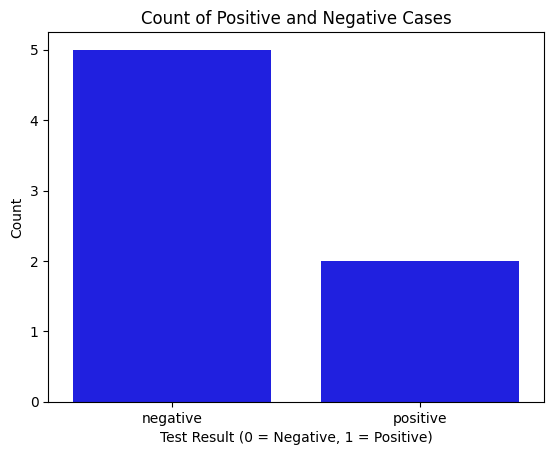

In [111]:
sns.countplot(x='Result', data=df, color='blue')

plt.title('Count of Positive and Negative Cases')
plt.xlabel('Test Result (0 = Negative, 1 = Positive)')

plt.ylabel('Count')

plt.show()

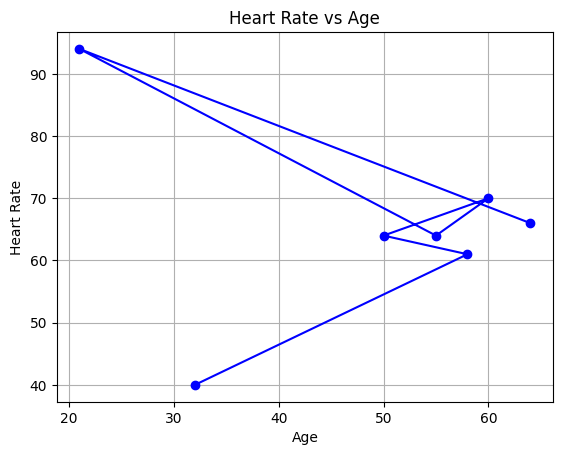

In [112]:
plt.plot(df['Age'], df['Heart rate'], marker='o', linestyle='-', color='blue')
plt.title("Heart Rate vs Age")

plt.xlabel("Age")
plt.ylabel("Heart Rate")

plt.grid()
plt.show()

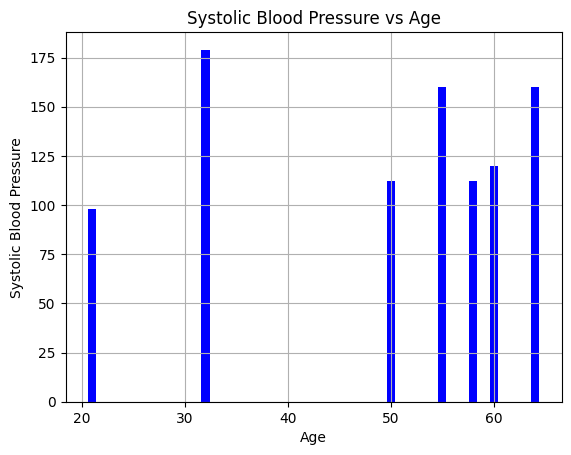

In [113]:
plt.bar(df['Age'], df['Systolic blood pressure'], color ='blue')
plt.title('Systolic Blood Pressure vs Age')

plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure')

plt.grid()
plt.show()

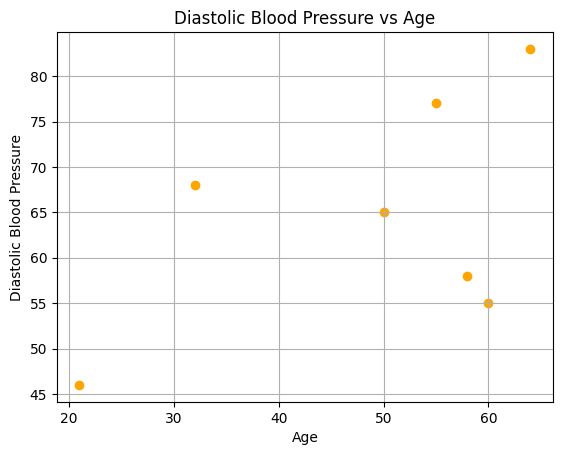

In [114]:
plt.scatter(df['Age'], df['Diastolic blood pressure'], color='orange')
plt.title('Diastolic Blood Pressure vs Age')
plt.xlabel('Age')
plt.ylabel('Diastolic Blood Pressure')
plt.grid()
plt.show()

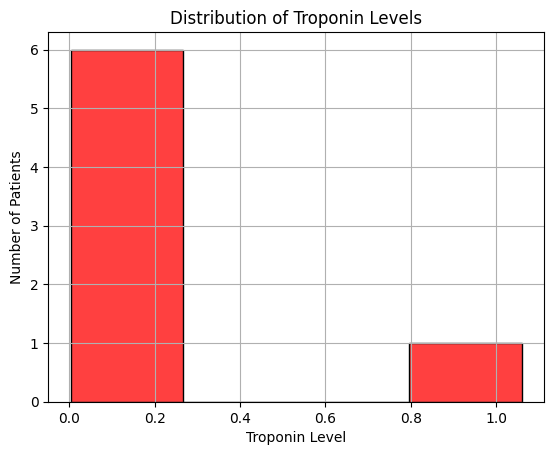

In [131]:
sns.histplot(df['Troponin'], bins=4, color='red')
plt.title('Distribution of Troponin Levels')
plt.xlabel('Troponin Level')
plt.ylabel('Number of Patients')
plt.grid()
plt.show()

In [125]:
df['Result'] = df['Result'].map({'negative': 0, 'positive': 1})


X = df.drop('Result', axis=1)
y = df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Performance Report:")
print(classification_report(y_test, y_pred))

Performance Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       155
           1       0.98      0.99      0.98       241

    accuracy                           0.98       396
   macro avg       0.98      0.98      0.98       396
weighted avg       0.98      0.98      0.98       396

